# Advanced Housing Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
#Read train and test file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

Univariate Analysis

In [5]:
#Univariate Analysis - Analysing SalePrice

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Prerna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


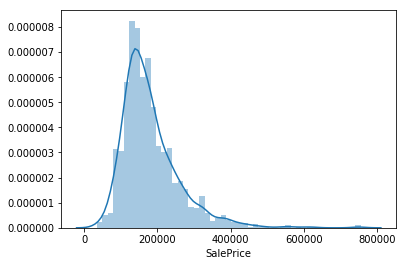

In [6]:
#Plot dist of SalePrice
sns.distplot(df_train['SalePrice'])

In [7]:
#SalePrice Skewness

df_train['SalePrice'].skew()

1.8828757597682129

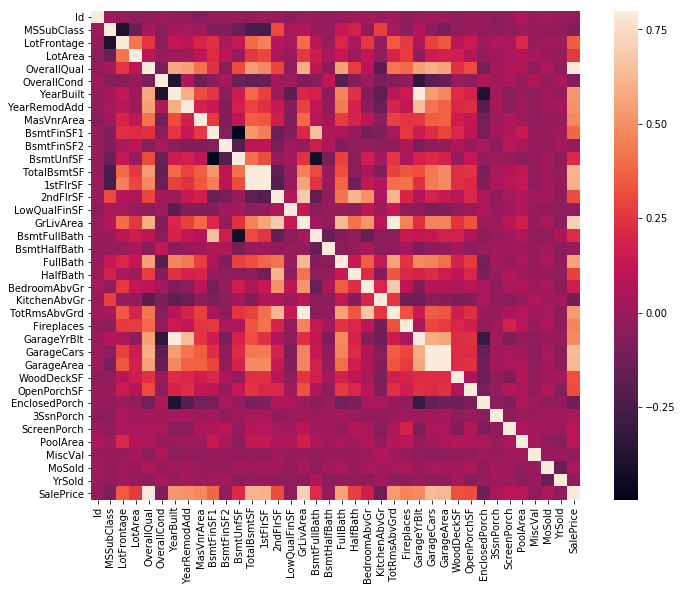

In [8]:
#Check the correlation of independent variables with SalePrice using corr matrix

plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(),vmax =0.8,square=True)

In [9]:
#Now check for the variables that have very high corr with SalePrice
corr_var = df_train.corr().abs()

In [10]:
top_10 = corr_var.nlargest(10,'SalePrice')['SalePrice']

In [11]:
top_10

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [12]:
#Remove few variables since they can lead to multicollinearity
# We can remove Garage Area since it is similar to GarageCars,1stFlrSF can also be removed

df_train.drop(columns=['GarageArea','1stFlrSF'],inplace=True)

In [13]:
#Do the same for test as well
df_test.drop(columns=['GarageArea','1stFlrSF'],inplace=True)

# Data Imputation for all missing values

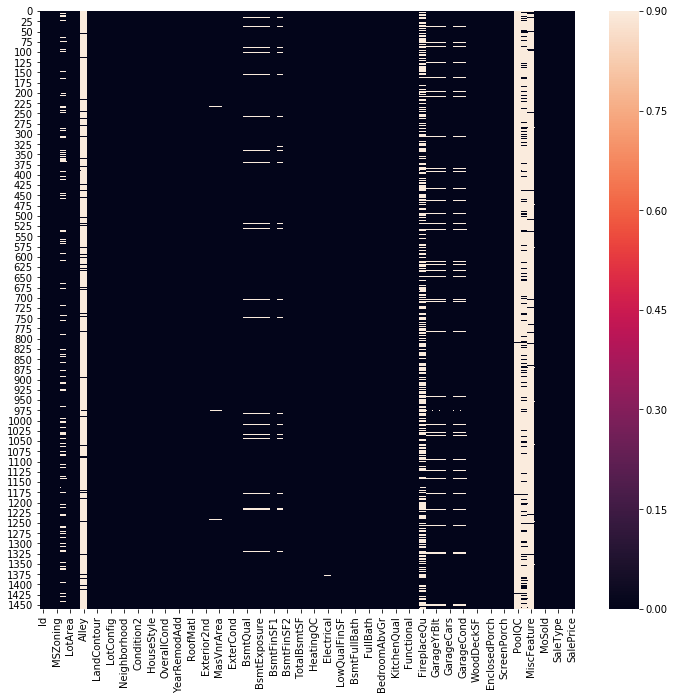

In [14]:
#Fill Missing data
plt.figure(figsize=(12,11))
sns.heatmap(df_train.isnull(),vmax = 0.9)

In [15]:
df_percent = df_train.isna().sum()/df_train.isna().count().sort_values(ascending = False)

In [16]:
#Drop columns that have very large NA values

df_na = df_train.isna().sum().sort_values(ascending = False)


In [17]:
na_data = pd.concat([df_na,df_percent],axis = 1,join ='inner',keys = ['NA_sum','Percent'])

In [18]:
na_data[na_data.Percent > 0.4]

,NA_sum,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [19]:
na_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
       'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
       'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
       'Condition1', 'MSZoning', 'LotArea', 'Street', 'Neighborhood',
       'LotShape', 'LandContour', 'LandSlope', 'SalePrice', 'Heating',
       'BsmtFinSF1', 'TotRmsAbvGrd', 'SaleType', 'YrSold', 'MoSold', 'MiscVal',
       'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',
       'WoodDeckSF', 'PavedDrive', 'GarageCars', 'Fireplaces', 'Functional',
       'KitchenQual', 'BsmtFinSF2', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath',


In [20]:
#Delete values that have NA greater than 0.4
df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],inplace=True)

In [21]:
#Delete the same from test as well
df_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],inplace=True)

In [22]:
df_train.shape

(1460, 74)

In [23]:
df_test.shape

(1459, 73)

In [24]:
#Now dealing with missing data for numerical and categorical features
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64


In [25]:
na_data[na_data.NA_sum>1]

,NA_sum,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
df_train.drop(columns=['Id'],inplace = True)
df_test.drop(columns=['Id'],inplace=True)

In [27]:
cols = df_train.select_dtypes(include=['int64','float64']).columns
col_test = df_test.select_dtypes(include = ['int64','float64']).columns

In [28]:
#For training set   
for col in cols:
        df_train[col] = df_train[col].fillna(df_train[col].median())

In [29]:
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [30]:
df_train.shape

(1460, 73)

In [31]:
#For test set
for col in col_test:
    df_test[col] = df_test[col].fillna(df_test[col].median())

In [32]:
#Now for Categorical variables

train_catg = df_train.select_dtypes(include = 'object').columns
test_catg = df_train.select_dtypes(include = 'object').columns

In [33]:
# Write function to fill mode of categorical var

for col in train_catg:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [34]:
#For test set
for col in test_catg:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

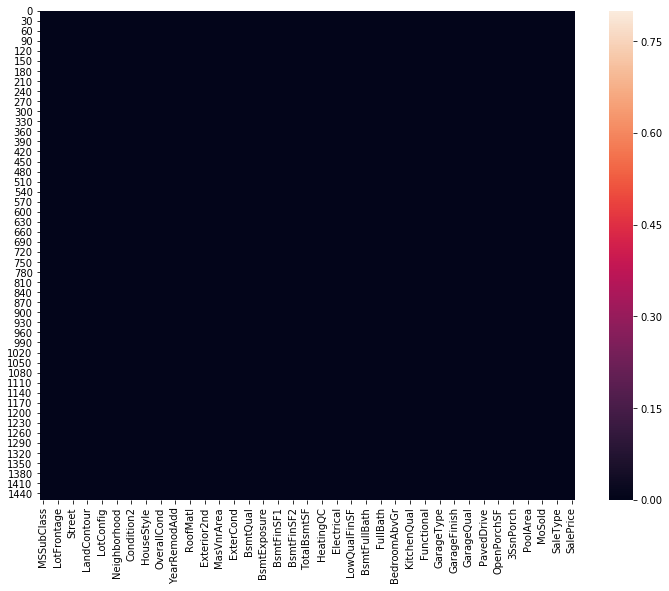

In [35]:
#Now checking for NA values in train and test set
plt.figure(figsize=(12,9))
sns.heatmap(df_train.isna(),vmax = 0.8)

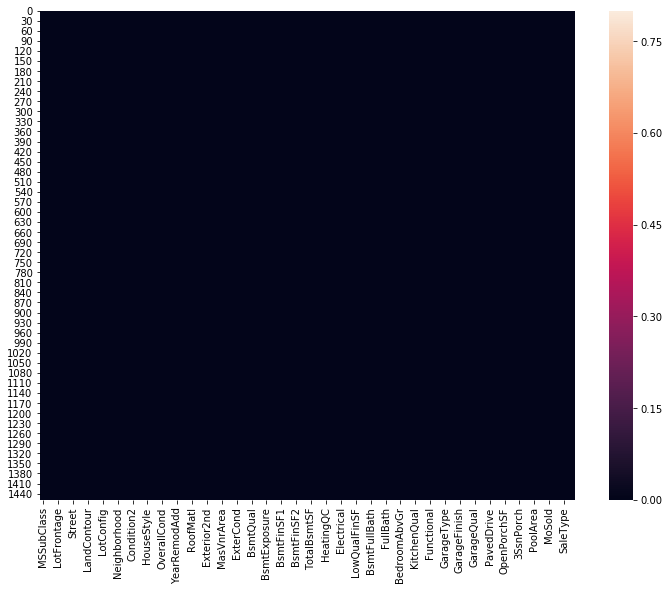

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(df_test.isna(),vmax = 0.8)

# One hot encoding of Catg variables

In [37]:
#Combine train and test set

full_data = pd.concat([df_train,df_test],axis = 0)


C:\Users\Prerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
full_data.shape

(2919, 73)

In [39]:
train_catg

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
catg_feat = full_data.select_dtypes(include='object').columns

In [41]:
catg_feat

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [42]:
one_hot = pd.get_dummies(full_data[catg_feat],drop_first=True)

In [43]:
one_hot.columns

Index(['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=196)

In [44]:
data = pd.concat([full_data,one_hot],axis = 1)

In [45]:
data.shape

(2919, 269)

In [46]:
data.drop(columns = catg_feat,inplace=True)

In [47]:
data.shape

(2919, 231)

In [48]:
import xgboost

In [49]:
train_set = data[:1460]

In [50]:
test_set = data[1460:]

# Split the data into train and test split

In [53]:
X = train_set.drop(columns=['SalePrice'])
y = train_set['SalePrice']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train The model

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [56]:
rgsc = RandomizedSearchCV(xgboost.XGBRegressor(),
                   {'booster':['gbtree','gblinear'],
                    'learning_rate':[0.05,0.1,0.2,0.3,0.4],
                    'min_child_weight': [1,3,5],
                    'gamma': [0.0,0.1,0.2],
                    'max_depth':[3,4,5],
                    'n_estimators':[100,300,500]
},n_iter=5,n_jobs=-1,cv=5,verbose=3,return_train_score=False)

In [57]:
rgsc.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   38.6s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'booster': ['gbtree', 'gblinear'], 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2], 'max_depth': [3, 4, 5], 'n_estimators': [100, 300, 500]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=False, scoring=None, verbose=3)

In [58]:
rgsc.cv_results_

{'mean_fit_time': array([1.64044299, 4.26543455, 4.35980067, 7.93464351, 2.4363327 ]),
 'std_fit_time': array([0.68685971, 0.47184689, 0.29038871, 0.90601958, 0.27683678]),
 'mean_score_time': array([0.01821351, 0.02812033, 0.02411737, 0.02661963, 0.02321711]),
 'std_score_time': array([0.00385765, 0.00602454, 0.00190901, 0.00682028, 0.0045708 ]),
 'param_n_estimators': masked_array(data=[100, 100, 300, 300, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 5, 3, 1, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 5, 3, 3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.3, 0.4, 0.2],
              mask=[False, False, False, False, False],
        fill_v

In [59]:
rgsc_df = pd.DataFrame(rgsc.cv_results_)

In [60]:
rgsc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.640443,0.686860,0.018214,0.003858,100,1,3,0.05,0,gbtree,"{'n_estimators': 100, 'min_child_weight': 1, '...",0.802255,0.512851,0.853604,0.861037,0.899951,0.785940,0.140043,3
1,4.265435,0.471847,0.028120,0.006025,100,5,5,0.05,0.2,gbtree,"{'n_estimators': 100, 'min_child_weight': 5, '...",0.860815,0.542433,0.852087,0.881722,0.889039,0.805219,0.132078,1
2,4.359801,0.290389,0.024117,0.001909,300,3,5,0.3,0.1,gblinear,"{'n_estimators': 300, 'min_child_weight': 3, '...",0.796061,0.263367,0.796228,0.814673,0.864788,0.707023,0.223246,5
3,7.934644,0.906020,0.026620,0.006820,300,1,3,0.4,0,gbtree,"{'n_estimators': 300, 'min_child_weight': 1, '...",0.772522,0.438449,0.890368,0.869545,0.868536,0.767884,0.169716,4
4,2.436333,0.276837,0.023217,0.004571,100,5,3,0.2,0,gbtree,"{'n_estimators': 100, 'min_child_weight': 5, '...",0.867119,0.457321,0.872626,0.873576,0.891439,0.792416,0.167747,2


In [61]:
rgsc.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [63]:
#Now putting the value into the regressor
xgreg = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=5, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [65]:
xgreg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

# Predictions and Evaluation

In [66]:
pred = xgreg.predict(X_test)

In [68]:
rmse = np.sqrt(mean_squared_error(y_test,pred))

In [69]:
rmse

25997.25820570638

# Actual prediction on test set

In [70]:
pred = xgreg.predict(test_set.drop(columns=['SalePrice']))
test_set['SalePrice'] = pred

C:\Users\Prerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
sample = pd.read_csv('sample_submission.csv')

In [73]:
final_data = pd.concat([sample['Id'],test_set['SalePrice']],axis = 1)

In [74]:
final_data.to_csv('Submission.csv',index=False)